## Simulación 9

Un promedio de 10 personas/hora con distribución de Poisson entran a los carriles centrales de una piscina con el fin de nadar un rato. En promedio, cada persona nada 30 minutos con distribución exponencial. En la piscina existen tres carriles disponibles para este tipo de nadadores. Si un nadador se encuentra sólo en un carril, nadara pegado siempre al lado derecho del carril; en caso de que otra persona entre en ese carril cada nadador realizara su ejercicio por un extremo del carril. Debido a políticas de seguridad nunca puede haber más de dos nadadores en un mismo carril, por esto, si un nadador llega y están ocupados los carriles se retira enojado y no regresa.
* ¿Cuál es la proporción del tiempo en la que habrá tres personas nadando?
* ¿Cuántas personas en promedio se encuentran nadando en la piscina?
* ¿Cuántos carriles es necesario asignar para asegurar que el 95% de este tipo de nadadores que llegan a la piscina puedan entrenar?



Instalar la librería Simpy (No viene por defecto en Colab)

In [97]:
pip install simpy

Llamar las librerías para la simulación.

In [98]:
import simpy
import random
import matplotlib.pyplot as plt

Definir la simulación

In [99]:
class Piscina:
    def __init__(self, env, num_carriles):
        self.env = env
        self.carriles = simpy.Resource(env, capacity=num_carriles)

    def nadar(self, nadador):
        yield self.env.timeout(random.expovariate(1 / mean_swimming))

def llegada(env, piscina, num_swimming_list):
    global happy_people, angry_people, t_3_swimming
    if len(piscina.carriles.queue) < 3:
        with piscina.carriles.request() as carril:
            yield carril
            yield env.process(piscina.nadar("nadador"))
            happy_people += 1
            if len(piscina.carriles.queue) == 3:
                t_3_swimming += env.now - t_last_three_swimming
    else:
        angry_people += 1
    num_swimming_list.append(happy_people - angry_people)

def llegadas(env, piscina, num_swimming_list):
    global happy_people, t_last_three_swimming
    while True:
        yield env.timeout(random.expovariate(1 / mean_interarrival))
        env.process(llegada(env, piscina, num_swimming_list))
        if len(piscina.carriles.queue) == 3:
            t_last_three_swimming = env.now

Definir las variables de la simulación.

In [100]:
mean_interarrival = 6 # Media de tiempo entre llegadas
mean_swimming = 30  # Tiempo promedio de nado en minutos
end_time = 600  # 10 horas en minutos

happy_people = 0
angry_people = 0
t_3_swimming = 0
t_last_three_swimming = 0
num_swimming_list = []

env = simpy.Environment()
piscina = Piscina(env, num_carriles=3)
env.process(llegadas(env, piscina, num_swimming_list))
env.run(until=end_time)

proporcion_tres_nadando = t_3_swimming / end_time
promedio_personas_nadando = (t_3_swimming * 3) / end_time
proporcion_espacio_disponible = happy_people / (happy_people + angry_people)

Ejecutar la simulación y mostrar en pantalla los resultados de la simulación

In [101]:
print("Promedio de personas nadando en la piscina:", promedio_personas_nadando)
print("Proporción del tiempo en la que hay tres personas nadando:", proporcion_tres_nadando)
print("Personas que encuentran espacio en la piscina al llegar:", happy_people)
print("Personas que no encuentran espacio en la piscina al llegar:", angry_people)

Promedio de personas nadando en la piscina: 0.375843445263973
Proporción del tiempo en la que hay tres personas nadando: 0.12528114842132435
Personas que encuentran espacio en la piscina al llegar: 59
Personas que no encuentran espacio en la piscina al llegar: 28


Graficar los resultados

In [102]:
num_carriles_list = [2, 3, 4]  # Lista de cantidades de carriles a probar
proporcion_espacio_disponible_list = []  # Lista para almacenar la proporción de espacio disponible

for num_carriles in num_carriles_list:
    happy_people = 0
    angry_people = 0
    t_3_swimming = 0
    t_last_three_swimming = 0
    num_swimming_list = []

    env = simpy.Environment()
    piscina = Piscina(env, num_carriles)
    env.process(llegadas(env, piscina, num_swimming_list))
    env.run(until=end_time)

    proporcion_espacio_disponible = happy_people / (happy_people + angry_people)
    proporcion_espacio_disponible_list.append(proporcion_espacio_disponible)

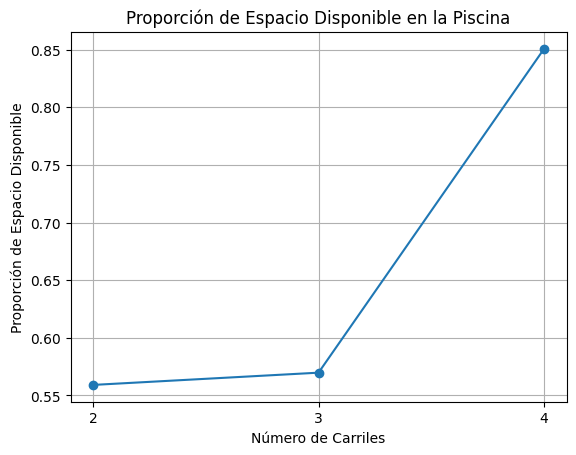

In [103]:
plt.plot(num_carriles_list, proporcion_espacio_disponible_list, marker='o')
plt.xlabel('Número de Carriles')
plt.ylabel('Proporción de Espacio Disponible')
plt.title('Proporción de Espacio Disponible en la Piscina')
plt.grid(True)
plt.xticks(num_carriles_list)
plt.show()

### Segundo escenario

Probar la simulación con un segundo escenario

In [104]:
print("Promedio de personas nadando en la piscina:", promedio_personas_nadando)
print("Proporción del tiempo en la que hay tres personas nadando:", proporcion_tres_nadando)
print("Personas que encuentran espacio en la piscina al llegar:", happy_people)
print("Personas que no encuentran espacio en la piscina al llegar:", angry_people)

Promedio de personas nadando en la piscina: 0.375843445263973
Proporción del tiempo en la que hay tres personas nadando: 0.12528114842132435
Personas que encuentran espacio en la piscina al llegar: 74
Personas que no encuentran espacio en la piscina al llegar: 13


In [105]:
num_carriles_list = [2, 3, 4]  # Lista de cantidades de carriles a probar
proporcion_espacio_disponible_list = []  # Lista para almacenar la proporción de espacio disponible

for num_carriles in num_carriles_list:
    happy_people = 0
    angry_people = 0
    t_3_swimming = 0
    t_last_three_swimming = 0
    num_swimming_list = []

    env = simpy.Environment()
    piscina = Piscina(env, num_carriles)
    env.process(llegadas(env, piscina, num_swimming_list))
    env.run(until=end_time)

    proporcion_espacio_disponible = happy_people / (happy_people + angry_people)
    proporcion_espacio_disponible_list.append(proporcion_espacio_disponible)

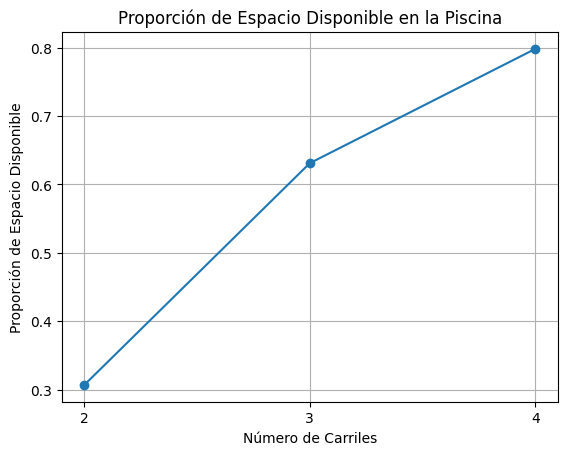

In [106]:
plt.plot(num_carriles_list, proporcion_espacio_disponible_list, marker='o')
plt.xlabel('Número de Carriles')
plt.ylabel('Proporción de Espacio Disponible')
plt.title('Proporción de Espacio Disponible en la Piscina')
plt.grid(True)
plt.xticks(num_carriles_list)
plt.show()

### Tercer escenario

Probar la simulación con un tercer escenario

In [107]:
print("Promedio de personas nadando en la piscina:", promedio_personas_nadando)
print("Proporción del tiempo en la que hay tres personas nadando:", proporcion_tres_nadando)
print("Personas que encuentran espacio en la piscina al llegar:", happy_people)
print("Personas que no encuentran espacio en la piscina al llegar:", angry_people)

Promedio de personas nadando en la piscina: 0.375843445263973
Proporción del tiempo en la que hay tres personas nadando: 0.12528114842132435
Personas que encuentran espacio en la piscina al llegar: 79
Personas que no encuentran espacio en la piscina al llegar: 20


In [108]:
num_carriles_list = [2, 3, 4]  # Lista de cantidades de carriles a probar
proporcion_espacio_disponible_list = []  # Lista para almacenar la proporción de espacio disponible

for num_carriles in num_carriles_list:
    happy_people = 0
    angry_people = 0
    t_3_swimming = 0
    t_last_three_swimming = 0
    num_swimming_list = []

    env = simpy.Environment()
    piscina = Piscina(env, num_carriles)
    env.process(llegadas(env, piscina, num_swimming_list))
    env.run(until=end_time)

    proporcion_espacio_disponible = happy_people / (happy_people + angry_people)
    proporcion_espacio_disponible_list.append(proporcion_espacio_disponible)

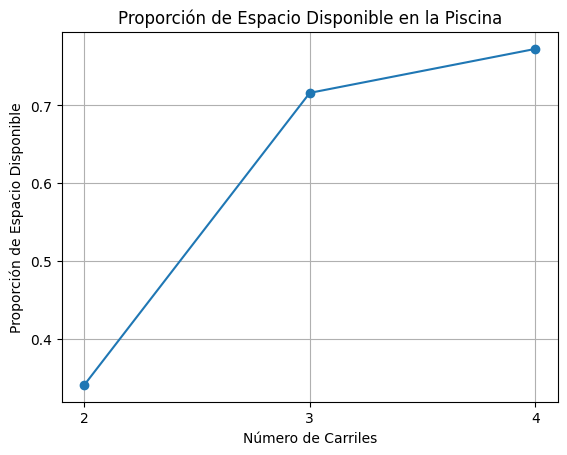

In [109]:
plt.plot(num_carriles_list, proporcion_espacio_disponible_list, marker='o')
plt.xlabel('Número de Carriles')
plt.ylabel('Proporción de Espacio Disponible')
plt.title('Proporción de Espacio Disponible en la Piscina')
plt.grid(True)
plt.xticks(num_carriles_list)
plt.show()